# vna: vector network analyzer
# psa: power spectrum analyzer
TONO:SINUSOIDE
arrivano in ingresso frequenze



---

settiamo una freq min e una max
misuriamo s21: forward trasmition - segnale trasmesso
quello che vediamo è in dB

In [8]:
pluto = pippo.query('INST:SEL?')
pluto

'"NA"\n'

In [10]:

pippo.query('CALC:PAR1:DEF S21;*OPC?')
# NON VA
# pippo.query('CALC:PAR1:SEL;*OPC?')
# pippo.query('DISP:WIND:TRAC1:Y:AUTO;*OPC?')

'1\n'

Text(0.5, 1.0, 'S21')

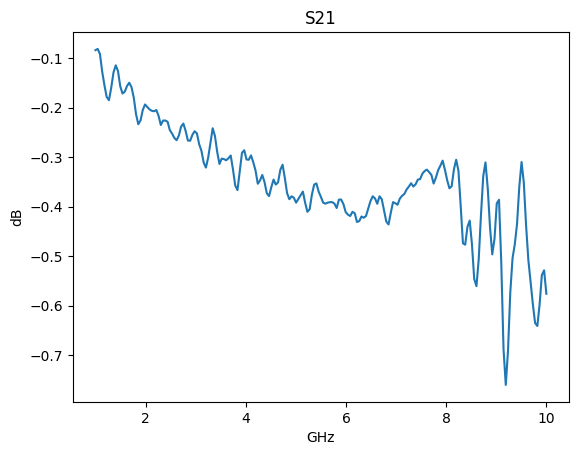

In [17]:
freqs = np.array(inietto)/1e9
plt.plot(freqs, c_dB)

# naming the x axis 
plt.xlabel('GHz') 
# naming the y axis 
plt.ylabel('dB')

# giving a title to my graph 
plt.title('S21')

In [2]:
# https://pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

import h5py
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import numpy as np
x = np.arange(100)                      # array di numeri da 0 a 99
y = np.random.normal(0 , 1, 100)        # cento numeri casuali con gauss, media 0, dev_std 1

with h5py.File("HDF5_try.hdf5", "w") as f:      # creo file hdf5 di nome tra virgolette e lo apro in modalità scrittura
    gp = f.create_group('Funzione')             # creo gruppo per i diversi dataset
    gp.create_dataset('x', data = x)            # creo i due dataset
    gp.create_dataset('y', data = y) 
    print(gp.items())
    a = 'x'
    print(gp.keys())
    if a in gp.keys():
        print('ciao')

ItemsViewHDF5(<HDF5 group "/Funzione" (2 members)>)
<KeysViewHDF5 ['x', 'y']>
ciao


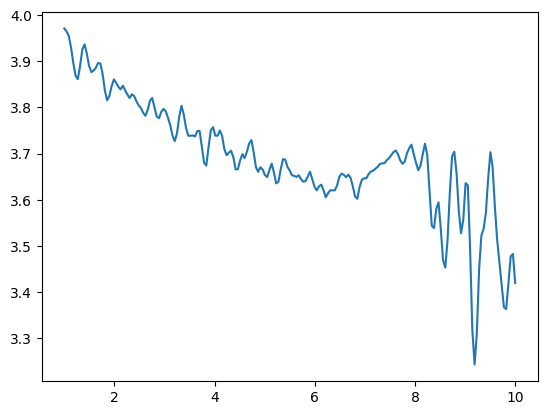

(201,)

In [73]:
I_mean = np.array([])
Q_mean = np.array([])
f_mean = np.array([])



with h5py.File("HDF52.hdf5", "r") as f:
   length = len(list(f['NA']))         # leggo file hdf5 (così lo apre in mod lettura e lo chiude)


   cnt = 0
   for j in list(f['NA']):
      
      if cnt == 4: 
         break

      i = np.array(f['NA'][j]['I'])
      q = np.array((f['NA'][j]['Q']))
      freq = np.array((f['NA'][j]['f']))
      
      if not I_mean.size:
         I_mean = i # il primo giro va fatto diviso 5
         Q_mean = q
         
         f_mean = freq
      else:   
         I_mean = I_mean + (i/length)
         Q_mean = Q_mean + (q/length)
         #f_mean = f_mean + (freq/length)
      cnt += 1

      #Q_mean = Q_mean + (q/length)
      #freq_mean = freq_mean + (freq/length)




plt.plot(f_mean , 10*np.log10(I_mean**2 + Q_mean**2))
plt.show()

np.shape(I_mean)
  
   

   
    